<a href="https://colab.research.google.com/github/MarrinXia/MSSP-607/blob/main/Week10_improved_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 – Internet Sales Yearly Summary

This notebook loads the **InternetSales** data, aggregates yearly sales, and creates a publication‑quality chart.

**Improvements compared with original version:**
- Clear structure with sections (load → transform → visualize)
- File paths and output paths are parameterized, not hard‑coded
- Reusable functions with docstrings for each major step
- More informative printouts and comments
- Plot function allows saving or just displaying the chart


In [1]:
#  Mount Google Drive when running in Google Colab
import sys

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Imports
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

# Set default paths (edit these if your file is in a different folder)
DATA_PATH = pathlib.Path('/content/drive/MyDrive/InternetSales.csv')
OUTPUT_PDF = pathlib.Path('/content/drive/MyDrive/yearly_sales_chart_improved.pdf')


## 1. Load data

In [3]:
def load_internet_sales(path: pathlib.Path) -> pd.DataFrame:
    """Load the InternetSales CSV and return a cleaned DataFrame.

    Expects at least the columns 'OrderDate' and 'SalesAmount'.
    """
    if not path.exists():
        raise FileNotFoundError(f"Data file not found: {path}")

    df = pd.read_csv(path, encoding='cp1252')
    print(f"✓ Loaded data from {path}")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())

    # Convert OrderDate to datetime
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])
    return df


# Load the data
df = load_internet_sales(DATA_PATH)

df.head()

✓ Loaded data from /content/drive/MyDrive/InternetSales.csv
Shape: (60398, 60)
Columns: ['ID', 'CustomerKey', 'GeographyKey', 'City', 'CountryRegionCode', 'EnglishCountryRegionName', 'CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance', 'ProductKey', 'EnglishProductName', 'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'CustomerKey.1', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber', 'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct', 'DiscountAmount', 'ProductStandardCost', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 

/tmp/ipython-input-3405495600.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='cp1252')


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2011-01-19,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2013-01-18,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2013-01-18,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2013-05-03,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2013-05-03,5/15/2013,5/10/2013


## 2. Aggregate yearly sales

In [4]:
def aggregate_yearly_sales(df: pd.DataFrame) -> pd.DataFrame:
    """Group by calendar year and sum SalesAmount."""
    df = df.copy()
    df['Year'] = df['OrderDate'].dt.year
    yearly = df.groupby('Year', as_index=False)['SalesAmount'].sum()
    yearly = yearly.sort_values('Year')
    print("\nYearly Sales Summary:")
    print(yearly)
    return yearly


yearly_sales = aggregate_yearly_sales(df)
yearly_sales


Yearly Sales Summary:
   Year   SalesAmount
0  2010  4.342104e+04
1  2011  7.075526e+06
2  2012  5.842485e+06
3  2013  1.635155e+07
4  2014  4.569472e+04


,Year,SalesAmount
0,2010,4.342104e+04
1,2011,7.075526e+06
2,2012,5.842485e+06
3,2013,1.635155e+07
4,2014,4.569472e+04


## 3. Plot yearly sales

✓ Chart saved to: /content/drive/MyDrive/yearly_sales_chart_improved.pdf


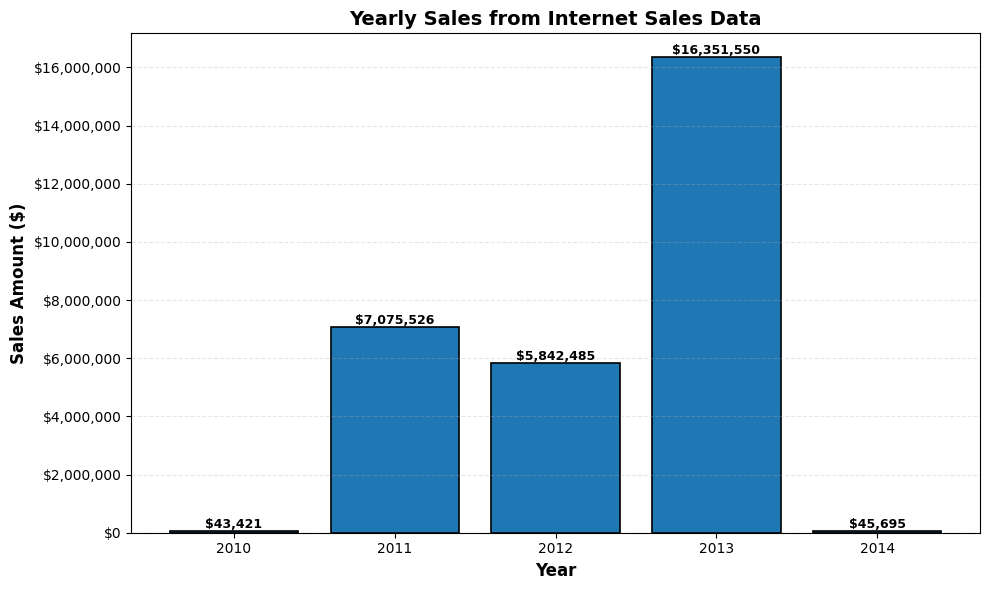

In [5]:
from matplotlib.ticker import FuncFormatter

def plot_yearly_sales(yearly_df: pd.DataFrame, output_path: pathlib.Path | None = None) -> None:
    """Create a bar chart of yearly internet sales.

    If `output_path` is provided, the figure is saved as a high‑resolution PDF.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_df['Year'], yearly_df['SalesAmount'],
            edgecolor='black', linewidth=1.2)

    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Sales Amount ($)', fontsize=12, fontweight='bold')
    plt.title('Yearly Sales from Internet Sales Data', fontsize=14, fontweight='bold')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # Label each bar with its value
    for _, row in yearly_df.iterrows():
        plt.text(row['Year'], row['SalesAmount'],
                 f"${row['SalesAmount']:,.0f}",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()

    if output_path is not None:
        plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=300)
        print(f"✓ Chart saved to: {output_path}")

    plt.show()


# Create and (optionally) save the chart
plot_yearly_sales(yearly_sales, OUTPUT_PDF)

After uploading my Week 7 InternetSales notebook to a generative AI tool, it suggested several improvements to make the code more professional and reusable. In particular, it recommended adding clear markdown section headers, avoiding hard-coded file paths by using variables, and wrapping the main steps (loading data, aggregating yearly sales, and plotting the chart) into separate functions with docstrings. The improved notebook now has a cleaner structure (load → transform → visualize) and a single plotting function that can both display and save the chart as a high-quality PDF. Going forward, I can use this approach to organize future notebooks so they are easier to read, reuse, and share before submission.